In [7]:
import og_gd
import og_fista
import og_ista
import jax_gd
import jax_ista
import pytorch_gd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import time

import jax
jax.config.update("jax_platform_name", "cpu")


import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
start = time.time()
n_iter = 6000
err_approx, cv_err, runtime = jax_gd.run_sim(250, 20, n_iter=n_iter)
print(err_approx.keys())
end = time.time()
print(end - start)

dict_keys(['IACV', 'NS', 'IJ', 'hat'])
331.0143918991089


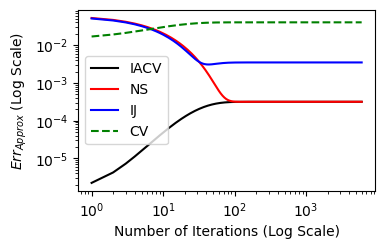

In [3]:
fig, ax = plt.subplots()
start_offset = 5
xx = np.arange(1, n_iter - start_offset + 1)
ax.plot(xx, err_approx['IACV'][start_offset:], c='black', label='IACV')
ax.plot(xx, err_approx['NS'][start_offset:], c='red', label='NS')
ax.plot(xx, err_approx['IJ'][start_offset:], c='blue', label='IJ')
ax.plot(xx, err_approx['hat'][start_offset:], c='green', linestyle='dashed', label='CV')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number of Iterations (Log Scale)')
ax.set_ylabel('$Err_{Approx}$ (Log Scale)')
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.tight_layout()
plt.show()
#plt.savefig('err_approx_250.pgf', bbox_inches='tight', pad_inches=0)

In [10]:
fig, ax = plt.subplots(1, 2)
start_offset = 1
xx = np.arange(1, n_iter - start_offset + 1)

for i, (dat, title) in enumerate(zip([err_approx, cv_err], ["$Err_{Approx}$", "$Err_{CV}$"])):
    ax[i].plot(xx, dat['IACV'][start_offset:], c='black', label='IACV')
    ax[i].plot(xx, dat['NS'][start_offset:], c='red', label='NS')
    ax[i].plot(xx, dat['IJ'][start_offset:], c='blue', label='IJ')
    ax[i].plot(xx, dat['hat'][start_offset:], c='green', linestyle='dashed', label='Baseline')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel('Number of Iterations (Log Scale)')
    ax[i].set_ylabel(f'{title} (Log Scale)')
    #ax.legend()
fig.legend(["IACV", "NS", "IJ", "Baseline"], loc="outside center right", bbox_to_anchor=(1.175, 0.6))
ws = 1.00 * 1.025 # 1.75
hs = 1.65 * 1.025 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.tight_layout()
plt.show()
plt.savefig('exp1_errs_250.pgf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_8992/170794492.py:20: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


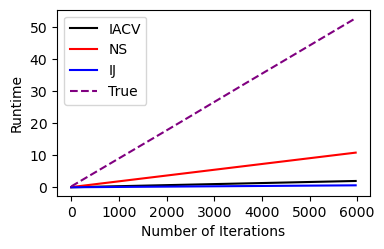

In [5]:
fig, ax = plt.subplots()
start_offset = 30
ax.plot(runtime['IACV'][start_offset:], c='black', label='IACV')
ax.plot(runtime['NS'][start_offset:], c='red', label='NS')
ax.plot(runtime['IJ'][start_offset:], c='blue', label='IJ')
ax.plot(runtime['true'][start_offset:], c='purple', label='True', linestyle='dashed')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Runtime')
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.tight_layout()
plt.show()
#plt.savefig('true_runtime.pgf', bbox_inches='tight', pad_inches=0)

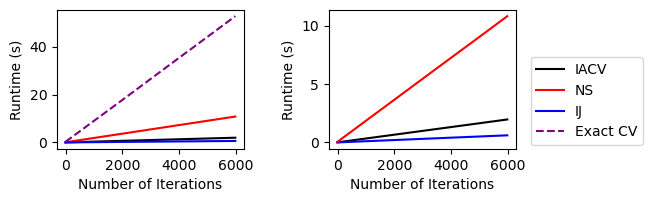

In [6]:
fig, ax = plt.subplots(1, 2)
start_offset = 30
ax[0].plot(runtime['IACV'][start_offset:], c='black', label='IACV')
ax[0].plot(runtime['NS'][start_offset:], c='red', label='NS')
ax[0].plot(runtime['IJ'][start_offset:], c='blue', label='IJ')
ax[0].plot(runtime['true'][start_offset:], c='purple', label='Exact CV', linestyle='dashed')
ax[0].set_xlabel('Number of Iterations')
ax[0].set_ylabel('Runtime (s)')
#ax[0].legend()
ax[1].plot(runtime['IACV'][start_offset:], c='black', label='IACV')
ax[1].plot(runtime['IJ'][start_offset:], c='blue', label='IJ')
ax[1].plot(runtime['NS'][start_offset:], c='red', label='NS')
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Runtime (s)')
#ax[1].legend()
#ax.legend()
ws = 1.05 # 1.75
hs = 1.65 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
fig.legend(["IACV", "NS", "IJ", "Exact CV"], loc="outside center right", bbox_to_anchor=(1.2, 0.5))
plt.tight_layout()
plt.show()
#plt.savefig('combined_runtime.pgf', bbox_inches='tight', pad_inches=0)